In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/XRAYCHECK

/content/drive/MyDrive/XRAYCHECK


In [ ]:
#!mv /content/drive/MyDrive/phphph-2 /content/drive/MyDrive/XRAYCHECK

In [3]:
pip install roboflow ultralytics 'git+https://github.com/facebookresearch/segment-anything.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-7ib19mfe
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-7ib19mfe
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("new-workspace-7hlof").project("phphph")
dataset = project.version(2).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.120, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to phphph-2 in yolov8:: 100%|██████████| 3060/3060 [15:40<00:00,  3.25it/s]


In [ ]:
from ultralytics import YOLO
# 1240X2829
# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data='/content/drive/MyDrive/XRAYCHECK/phphph-2/data.yaml',
   imgsz=1280,
   epochs=50,
   batch=8,
   name='yolov8n_v8_50e'
)

In [4]:
from ultralytics import YOLO

best='/content/drive/MyDrive/XRAYCHECK/runs/detect/yolov8n_v8_50e7/weights/best.pt'
model = YOLO(best)

In [5]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

print("PyTorch version:", torch.__version__)
print("CUDA is available:", torch.cuda.is_available())

!git clone https://github.com/SysCV/sam-hq.git
os.chdir('sam-hq')
!export PYTHONPATH=$(pwd)
from segment_anything import sam_model_registry, SamPredictor


PyTorch version: 2.0.1+cu118
CUDA is available: True
fatal: destination path 'sam-hq' already exists and is not an empty directory.


In [6]:
!mkdir pretrained_checkpoint
!wget https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth
!mv sam_hq_vit_l.pth pretrained_checkpoint

mkdir: cannot create directory ‘pretrained_checkpoint’: File exists
--2023-06-23 12:43:57--  https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth
Resolving huggingface.co (huggingface.co)... 13.224.249.43, 13.224.249.119, 13.224.249.10, ...
Connecting to huggingface.co (huggingface.co)|13.224.249.43|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/d9/4e/d94e04992ac4e3ea45fcc1c523974540cdbef274e295d4aaacc69b4f19ee63b7/e1a6c385d62bf005ded91a54d5ec55c985cfc4103ef89c08d90f39f04934c343?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27sam_hq_vit_l.pth%3B+filename%3D%22sam_hq_vit_l.pth%22%3B&Expires=1687783438&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2Q5LzRlL2Q5NGUwNDk5MmFjNGUzZWE0NWZjYzFjNTIzOTc0NTQwY2RiZWYyNzRlMjk1ZDRhYWFjYzY5YjRmMTllZTYzYjcvZTFhNmMzODVkNjJiZjAwNWRlZDkxYTU0ZDVlYzU1Yzk4NWNmYzQxMDNlZjg5YzA4ZDkwZjM5ZjA0OTM0YzM0Mz9yZXNwb25zZS1jb250Z

In [31]:

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    print('box:',box)
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


def show_res(masks, scores, input_point, input_label, input_box, image):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        show_mask(mask, plt.gca())
        if input_box is not None:
            box = input_box[i]
            show_box(box, plt.gca())
        if (input_point is not None) and (input_label is not None):
            show_points(input_point, input_label, plt.gca())

        print(f"Score: {score:.3f}")
        plt.axis('off')
        plt.show()


def show_res_multi(masks, scores, input_point, input_label, input_box, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    for mask in masks:
        #print(mask.shape,mask)
        show_mask(mask, plt.gca(), random_color=True)
    for box in input_box:
        #print(box.shape,box)
        show_box(box, plt.gca())
    for score in scores:
        print(f"Score: {score:.3f}")
    plt.axis('off')
    plt.show()


In [8]:
sam_checkpoint = "pretrained_checkpoint/sam_hq_vit_l.pth"
model_type = "vit_l"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

<All keys matched successfully>


In [9]:
testpath='/content/drive/MyDrive/XRAYCHECK/phphph-2/test/images/01-10-2021_2_png.rf.0ea79b55a6a35c70066d1e8a1cd9c492.jpg'

In [10]:
results = model.predict(source=testpath, conf=0.25)


image 1/1 /content/drive/MyDrive/XRAYCHECK/phphph-2/test/images/01-10-2021_2_png.rf.0ea79b55a6a35c70066d1e8a1cd9c492.jpg: 1280x576 14 0s, 65.7ms
Speed: 18.0ms preprocess, 65.7ms inference, 30.3ms postprocess per image at shape (1, 3, 1280, 1280)


In [25]:
bbox=[]
for result in results:
    boxes = result.boxes
    for bb in boxes:
      bbox.append(bb.xyxy.tolist()[0])
print(bbox)

[[214.4977569580078, 619.8783569335938, 306.5378112792969, 688.2791137695312], [75.74138641357422, 987.0007934570312, 134.01956176757812, 1097.876953125], [426.76397705078125, 1215.2261962890625, 518.27392578125, 1378.425048828125], [298.4677429199219, 592.4489135742188, 386.5455627441406, 679.2208251953125], [280.8608093261719, 1096.1416015625, 433.42730712890625, 1166.25390625], [85.87547302246094, 749.2589721679688, 157.34378051757812, 846.7119140625], [341.12774658203125, 1011.7205200195312, 391.7408142089844, 1095.5943603515625], [454.3033142089844, 1705.8157958984375, 501.5675964355469, 1783.0228271484375], [430.7314453125, 678.1651611328125, 503.5728454589844, 706.9860229492188], [451.7735900878906, 1404.0994873046875, 493.3671569824219, 1468.4764404296875], [385.63043212890625, 1598.779052734375, 424.3683166503906, 1720.1820068359375], [557.7740478515625, 1080.505615234375, 627.6428833007812, 1130.917724609375], [226.55625915527344, 1409.002197265625, 247.3874969482422, 1477.52

In [28]:
image = cv2.imread(testpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_box = np.array(bbox)

#print(input_box.shape,input_box)
input_point, input_label = None, None
predictor.set_image(image)
allmasks=[]
for i in range(len(bbox)):
  #print(input_box[i])
  masks, scores, logits = predictor.predict(
      point_coords=input_point,
      point_labels=input_label,
      box = input_box[i],
      multimask_output=False,
      hq_token_only= False,
  )
  #print(masks.shape)
  allmasks.append(masks[0])

#print(allmasks)

box: [      214.5      619.88      306.54      688.28]
box: [     75.741         987      134.02      1097.9]
box: [     426.76      1215.2      518.27      1378.4]
box: [     298.47      592.45      386.55      679.22]
box: [     280.86      1096.1      433.43      1166.3]
box: [     85.875      749.26      157.34      846.71]
box: [     341.13      1011.7      391.74      1095.6]
box: [      454.3      1705.8      501.57        1783]
box: [     430.73      678.17      503.57      706.99]
box: [     451.77      1404.1      493.37      1468.5]
box: [     385.63      1598.8      424.37      1720.2]
box: [     557.77      1080.5      627.64      1130.9]
box: [     226.56        1409      247.39      1477.5]
box: [     583.13      1080.2      626.67      1130.7]
Score: 0.888


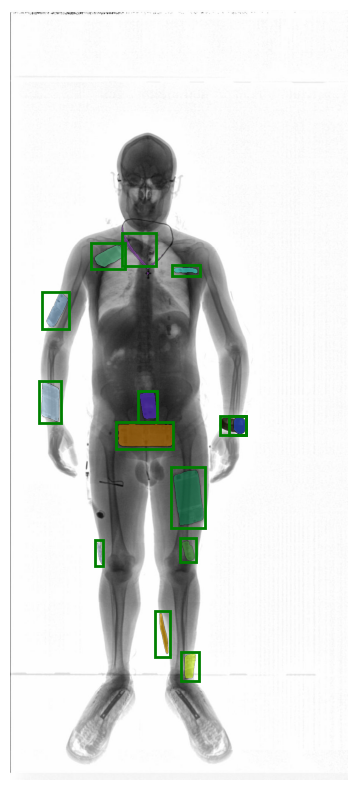

In [32]:
show_res_multi(allmasks,scores,input_point, input_label, input_box, image)